# **Datadownload** **using** **Colab**

In [1]:
# check GPU
!nvidia-smi

Fri Dec 13 01:44:31 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files

In [4]:
uploaded = files.upload()

In [7]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


# **Kaggle** **API** **to** **Download** **Data**

In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!echo '{"username":"karentree","key":"ff57b9d030d708de9af1a8da9558d6df"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle datasets download -d karentree/artchanllage-genre-classification

 99% 2.34G/2.36G [00:55<00:00, 57.0MB/s]
100% 2.36G/2.36G [00:55<00:00, 45.7MB/s]


In [10]:
!unzip artchanllage-genre-classification.zip

Archive:  artchanllage-genre-classification.zip
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_1.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_10.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_11.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_12.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_13.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_14.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_15.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_16.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_17.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_18.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_19.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_2.jpg  
  inflating: genre/Abstract_Expressionism/Abstract_Expressionism_2

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.callbacks import *
from keras.initializers import *
from keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

Using TensorFlow backend.


In [0]:
os.remove('/content/genre/Northern_Renaissance/Northern_Renaissance_11.jpg')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
# read csv
artists_unique = pd.read_csv("/content/artists_unique.csv")
artists_unique.head()

,Unnamed: 0,name,years,genre,nationality,paintings,number_of_genre,underscore
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,['Italian'],193,1,Amedeo_Modigliani
1,3,Claude Monet,1840 - 1926,Impressionism,['French'],73,1,Claude_Monet
2,5,Salvador Dali,1904 - 1989,Surrealism,['Spanish'],139,1,Salvador_Dali
3,7,Andrei Rublev,1360 - 1430,Byzantine_Art,['Russian'],99,1,Andrei_Rublev
4,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,['Dutch'],877,1,Vincent_van_Gogh


In [0]:
genre_series = artists_unique.groupby('genre')['paintings'].sum()
genre_df = pd.DataFrame(genre_series, columns=['paintings'])
genre_df['genre_weight'] = genre_df['paintings'] /(genre_df.shape[0] * genre_df['paintings'])

# **EDA**

Text(0, 0.5, 'Painting Count')

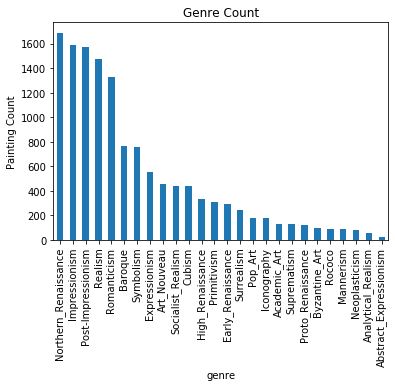

In [18]:
genre_df['paintings'].sort_values(ascending=False).plot(kind="bar")
plt.title('Genre Count')
plt.ylabel('Painting Count')

Text(0, 0.5, 'Artist Count')

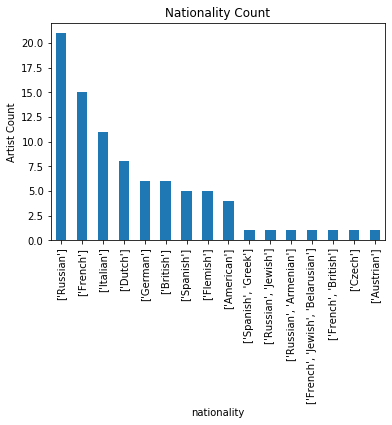

In [19]:
nationality_series = artists_unique.groupby('nationality')['number_of_genre'].sum()
nationality_series
nationality_df = pd.DataFrame(nationality_series, columns=['number_of_genre'])
#nationality_df
nationality_df['number_of_genre'].sort_values(ascending=False).plot(kind="bar")
plt.title('Nationality Count')
plt.ylabel('Artist Count')

In [0]:
genre_top5 = genre_df['paintings'].sort_values(ascending=False)[:5].index

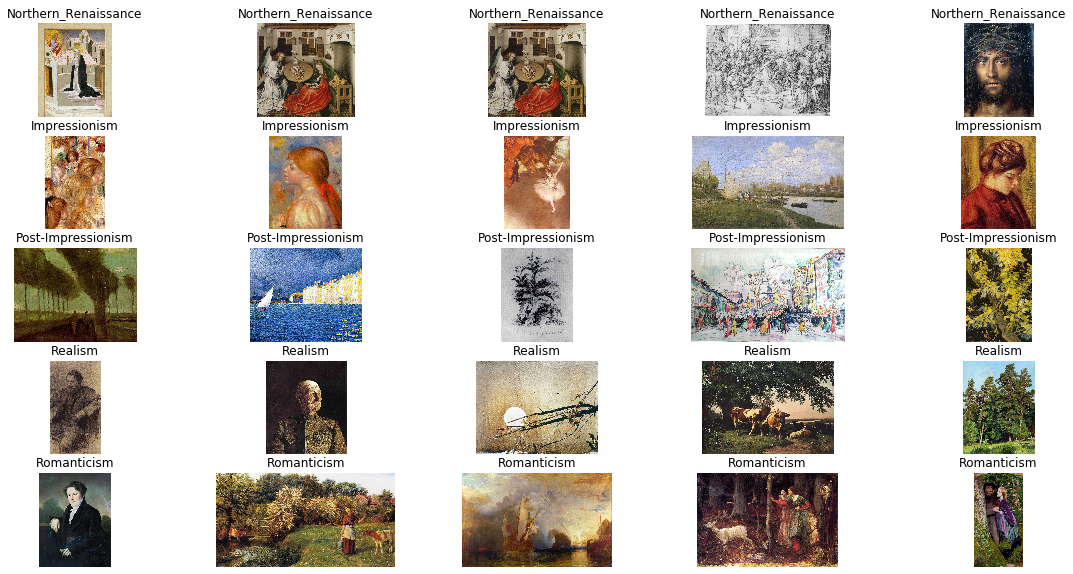

In [23]:

n = 5
fig, axes = plt.subplots(5, n, figsize=(20,10))

genre_dir = '/content/genre/'
for i, genre in enumerate(genre_top5):
  for j in range(n):
    random_image_file = random.choice(os.listdir(genre_dir+genre))
    #print(random_image_file)
    image = plt.imread(os.path.join(genre_dir,genre,random_image_file))
    axes[i][j].imshow(image)
    axes[i][j].axis('off')
    axes[i][j].set_title(genre)
plt.show()

# **Data** **Augmentation**

In [0]:
# Initialize the data augmenter as an empty image data generator
aug = ImageDataGenerator(validation_split=0.2,
                         rescale=1./255.,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.15,
                         horizontal_flip=True)

In [0]:
genre_series = genre_series[genre_series > 200]

In [26]:
genre_series.index.to_list()

['Art_Nouveau',
 'Baroque',
 'Cubism',
 'Early_Renaissance',
 'Expressionism',
 'High_Renaissance',
 'Impressionism',
 'Northern_Renaissance',
 'Post-Impressionism',
 'Primitivism',
 'Realism',
 'Romanticism',
 'Socialist_Realism',
 'Surrealism',
 'Symbolism']

In [27]:
batch_size = 12
train_input_shape = (224, 224, 3)

train_generator = aug.flow_from_directory(directory=genre_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=genre_series.index.to_list()
                                                   )
valid_generator = aug.flow_from_directory(directory=genre_dir,
                                               class_mode='categorical',
                                               target_size=train_input_shape[0:2],
                                               batch_size=batch_size,
                                               subset="validation",
                                               shuffle=True,
                                               classes=genre_series.index.to_list())
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 9801 images belonging to 15 classes.
Found 2443 images belonging to 15 classes.
Total number of batches = 816 and 203


# **VGG** **Model**

In [0]:
from keras.applications import vgg16

In [0]:
import numpy as np
import os
import time
#from vgg16 import VGG16
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
#from imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense



In [30]:
image_input = Input(shape=(224, 224, 3))
model = vgg16.VGG16(input_tensor=image_input,include_top=True,weights='imagenet')
model.summary()





553467904/553467096 [==============================] - 34s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________

In [31]:
np.random.seed(1000)
n_class = 15
num_classes = n_class
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
#model.add(out)
#model.summary()
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [32]:
#custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
custom_vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
for layer in custom_vgg_model.layers[:-3]:
	layer.trainable = False


In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')


In [34]:
epochs = 30
nb_train_samples = 9801
nb_validation_samples = 2443
csv_logger = CSVLogger("VGG16_history_genre_200_log.csv", append=True)
history1 = custom_vgg_model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    shuffle =True,
    verbose=1,
    workers=16,
    use_multiprocessing=True,
    callbacks = [reduce_lr,csv_logger]
     )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


816/816 [==============================] - 154s 189ms/step - loss: 1.9694 - acc: 0.3732 - val_loss: 1.7643 - val_acc: 0.4236
Epoch 2/30
816/816 [==============================] - 148s 181ms/step - loss: 1.4899 - acc: 0.5285 - val_loss: 1.5335 - val_acc: 0.4846
Epoch 3/30
816/816 [==============================] - 147s 180ms/step - loss: 1.2563 - acc: 0.6031 - val_loss: 1.5755 - val_acc: 0.4936
Epoch 4/30
816/816 [==============================] - 146s 179ms/step - loss: 1.0993 - acc: 0.6439 - val_loss: 1.4991 - val_acc: 0.5043
Epoch 5/30
816/816 [==============================] - 143s 176ms/step - loss: 0.9828 - acc: 0.6831 - val_loss: 1.4773 - val_acc: 0.5582
Epoch 6/30
816/816 [==============================] - 144s 177ms/step - loss: 0.8822 - acc: 0.7143 - val_loss: 1.3870 - val_acc: 0.5438
Epoch 7/30
816/816 [==============================] - 144s 177ms/step - loss: 0.8124 - acc: 0.7409 - val_loss: 1.3855 - val_acc: 0.5742
Epoch 8/30
816/816 [==============================] - 143s 

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
!cp /content/VGG16_history_genre_200_log.csv /content/gdrive/My\ Drive/

In [0]:
from keras.models import load_model

path = "/content/gdrive/My Drive/VGG16_model_genre_200.h5" 
custom_vgg_model.save(path)

# **Summary** **Output**

In [0]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns

n_classes = genre_series.shape[0]
tick_labels = genre_series.index.to_list()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
    
    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=tick_labels))

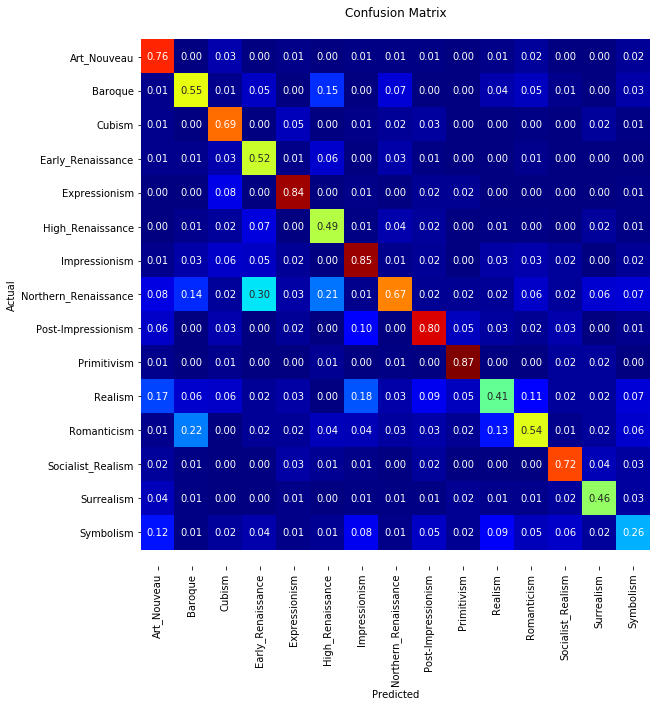

Classification Report:
                      precision    recall  f1-score   support

         Art_Nouveau       0.58      0.76      0.65        90
             Baroque       0.53      0.55      0.54       153
              Cubism       0.64      0.69      0.66        87
   Early_Renaissance       0.48      0.52      0.50        56
       Expressionism       0.79      0.84      0.82       109
    High_Renaissance       0.49      0.49      0.49        67
       Impressionism       0.64      0.85      0.73       318
Northern_Renaissance       0.73      0.67      0.70       337
  Post-Impressionism       0.72      0.80      0.76       314
         Primitivism       0.83      0.87      0.85        61
             Realism       0.52      0.41      0.46       295
         Romanticism       0.60      0.54      0.57       264
   Socialist_Realism       0.76      0.72      0.74        87
          Surrealism       0.67      0.46      0.54        48
           Symbolism       0.42      0.26     

In [39]:
showClassficationReport_Generator(custom_vgg_model, valid_generator, STEP_SIZE_VALID)

Text(0, 0.5, 'accuracy')

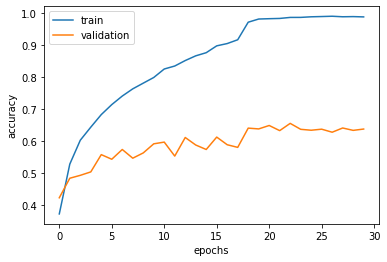

In [40]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'], label='train')
plt.plot(history1.history['val_acc'], label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')